# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [4246]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [4247]:
# %pip install --upgrade plotly

### Import Statements

In [4248]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4249]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4250]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4251]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [4252]:
print(f'Number of rows: {df_data.shape[0]}')
print(f'Number of columns: {df_data.shape[1]}')

Number of rows: 4324
Number of columns: 9


In [4253]:
# Print column names
i = 1
for column in df_data.columns:
    print(f'Column {i}: {column}')
    i += 1

Column 1: Unnamed: 0.1
Column 2: Unnamed: 0
Column 3: Organisation
Column 4: Location
Column 5: Date
Column 6: Detail
Column 7: Rocket_Status
Column 8: Price
Column 9: Mission_Status


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [4254]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [4255]:
# Get all rows containing NaN values in Price column
df_data[df_data.isnull().any(axis=1)]
# Number of rows containing NaN values
print(f'Number of rows containing NaN values: {df_data[df_data.isnull().any(axis=1)].shape[0]}')

Number of rows containing NaN values: 3360


In [4256]:
print(f'Is there duplicated data: {df_data.duplicated().any()}')

Is there duplicated data: False


In [4257]:
# Remove first two columns as they are redundant
df_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [4258]:
# Convert price data to numeric data
df_data['Price'] = df_data['Price'].str.replace(',','')
df_data['Price'] = df_data['Price'].astype(float)

In [4259]:
# Convert date data to datetime object
df_data['Date'] = pd.to_datetime(df_data['Date'],utc=True).dt.date
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Descriptive Statistics

In [4260]:
df_data.nunique().to_frame(name='Number of unique values')

,Number of unique values
Organisation,56
Location,137
Date,3922
Detail,4278
Rocket_Status,2
Price,56
Mission_Status,4


In [4261]:
df_data['Mission_Status'].value_counts().to_frame()

,Mission_Status
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [4262]:
df_data['Rocket_Status'].value_counts().to_frame()

,Rocket_Status
StatusRetired,3534
StatusActive,790


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [4263]:
num_space_missions_by_orgs = df_data.groupby('Organisation').agg({'Organisation':pd.Series.count})['Organisation']
num_space_missions_by_orgs = num_space_missions_by_orgs.sort_values(ascending=False)

In [4264]:
fig = px.bar(x=num_space_missions_by_orgs.index,y=num_space_missions_by_orgs.values,title='Number of Launches per Company')
fig.update_layout(xaxis_title='Organisation',yaxis_title='Number of Launches')
fig.show()

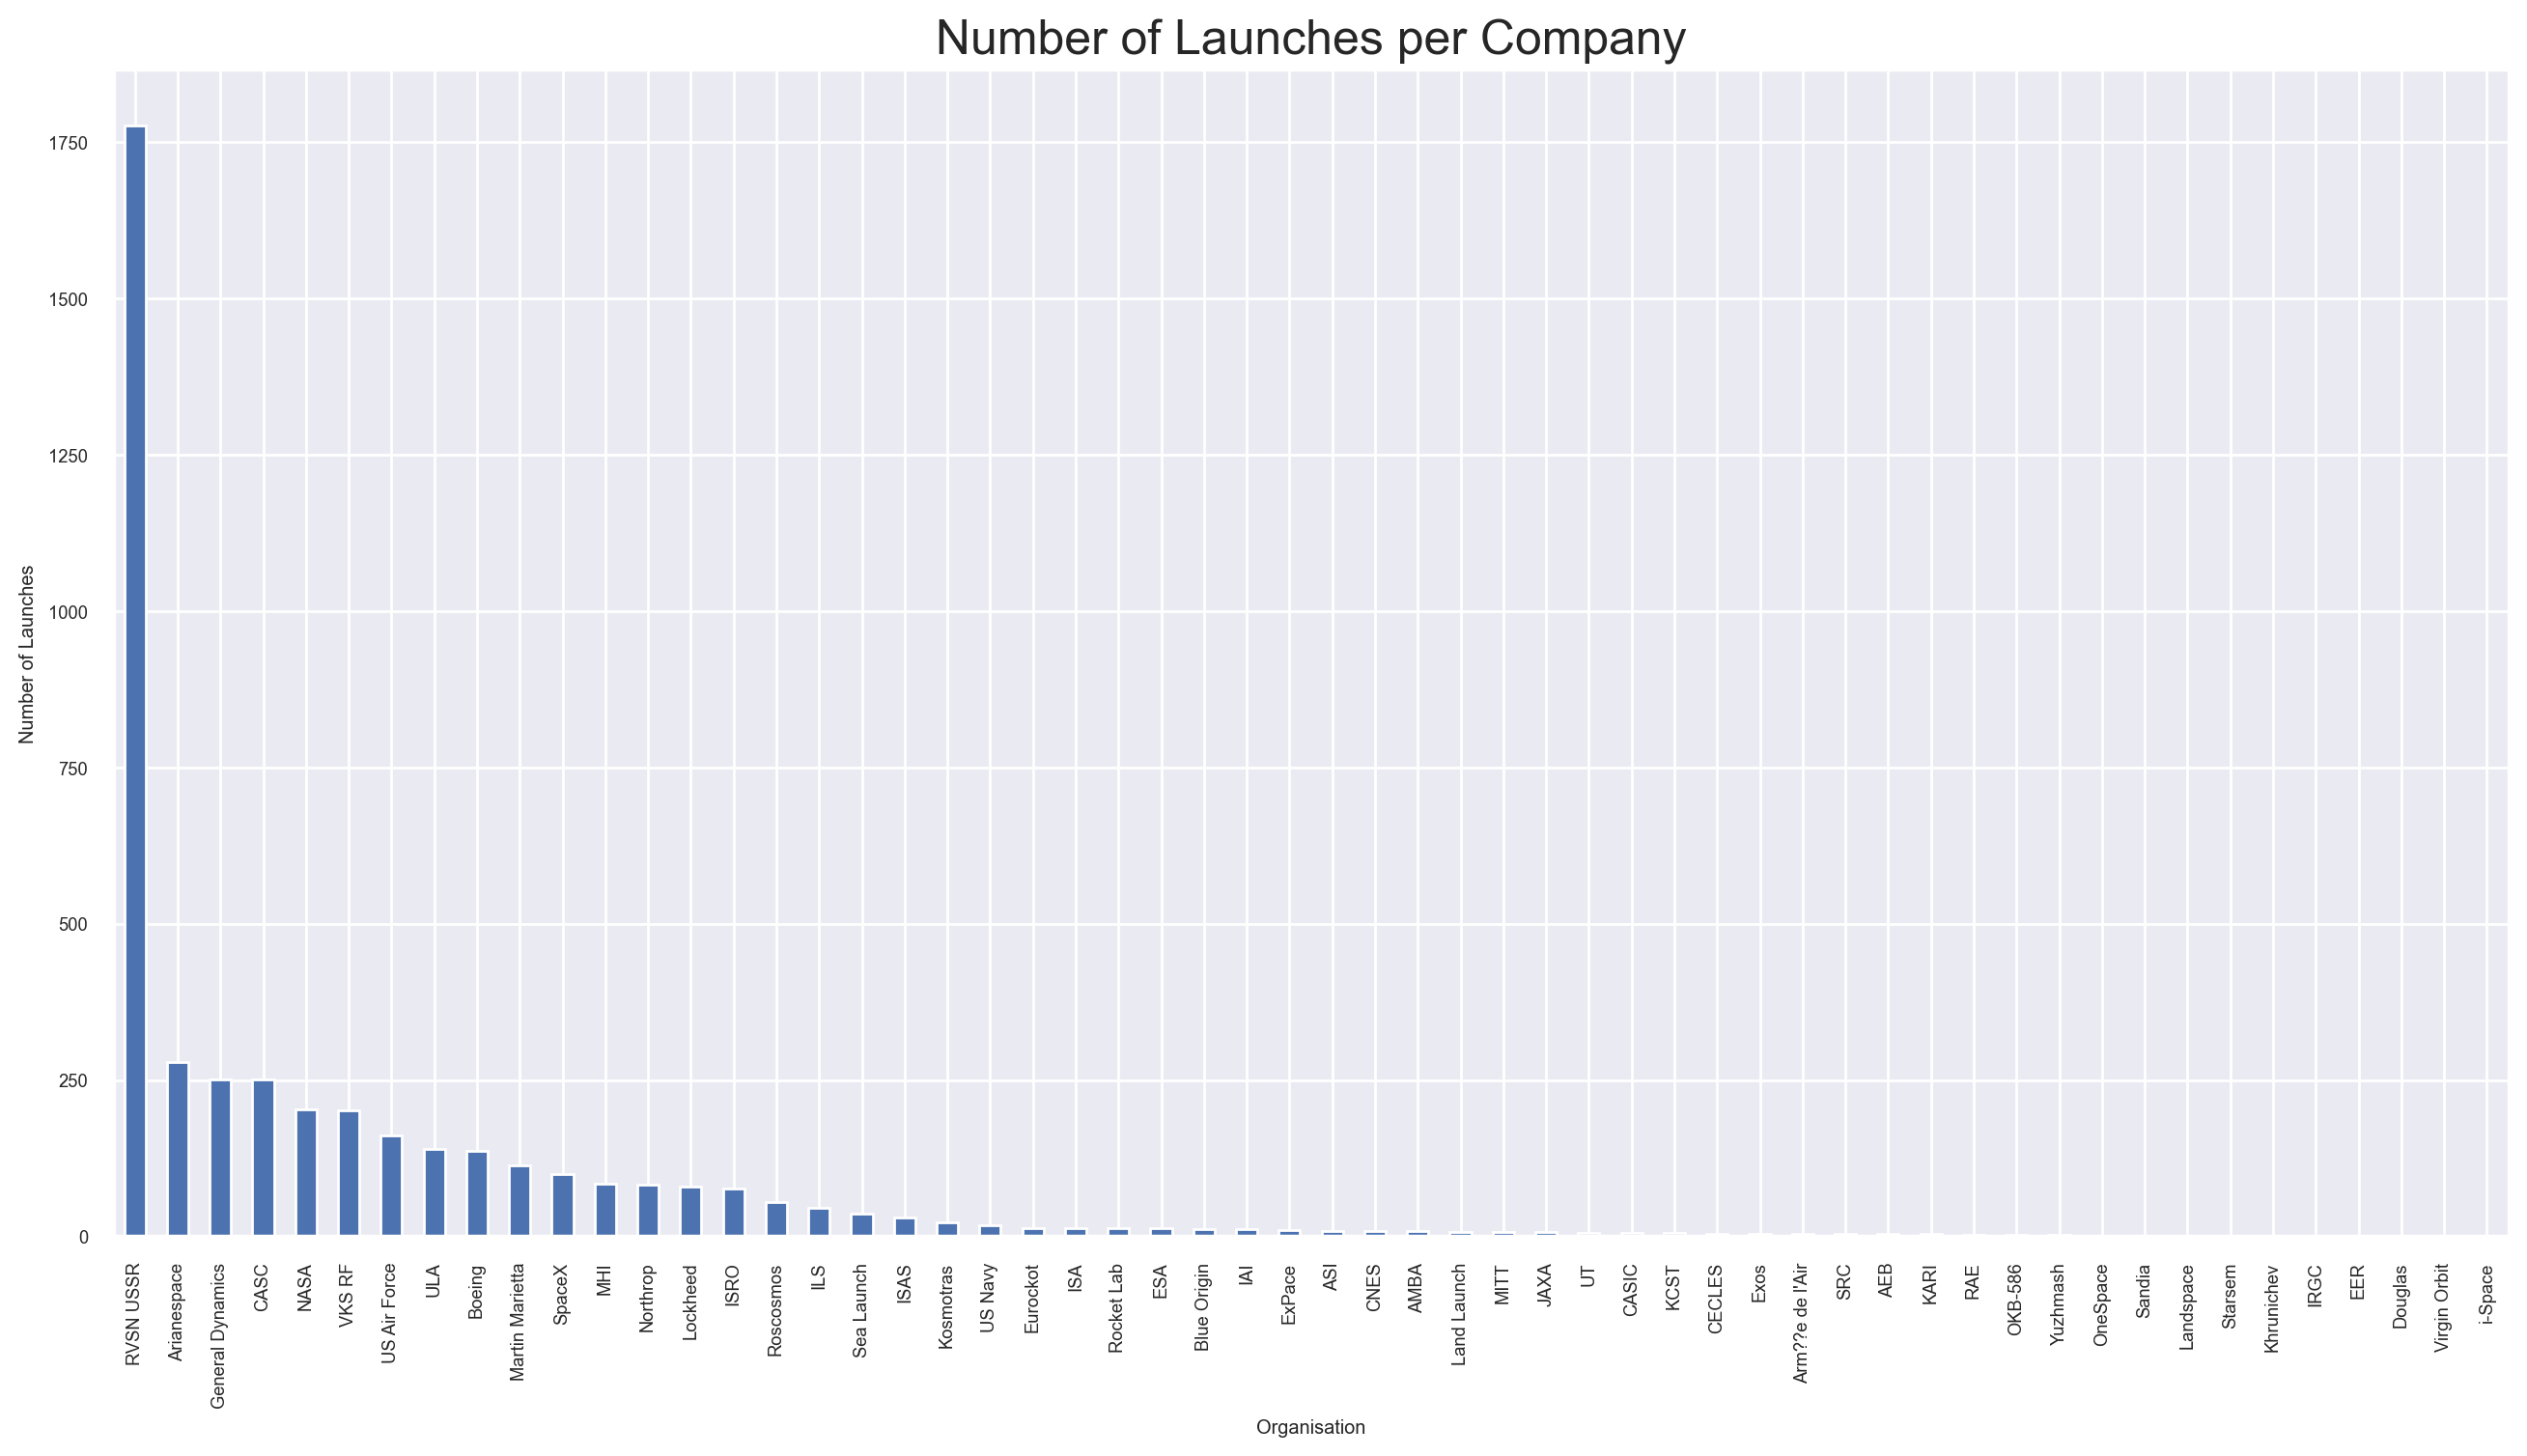

In [4265]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches per Company', fontsize=18)
fig = num_space_missions_by_orgs.plot.bar(rot=90)
fig.set_ylabel('Number of Launches')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [4266]:
print(f"Number of active rockets: {df_data[df_data['Rocket_Status'] == 'StatusActive'].shape[0]}")

Number of active rockets: 790


In [4267]:
print(f"Number of decomissioned rockets: {df_data[df_data['Rocket_Status'] == 'StatusRetired'].shape[0]}")

Number of decomissioned rockets: 3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [4268]:
print(f"Number of successful missions: {df_data[df_data['Mission_Status'] == 'Success'].shape[0]}")

Number of successful missions: 3879


In [4269]:
print(f"Number of failed missions: {df_data[df_data['Mission_Status'] == 'Failure'].shape[0] + df_data[df_data['Mission_Status'] == 'Partial Failure'].shape[0] + df_data[df_data['Mission_Status'] == 'Prelaunch Failure'].shape[0]}")

Number of failed missions: 445


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [4270]:
price_data = df_data[df_data['Price'].isna() == False]
price_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,Titan IIIB | KH-8,StatusRetired,59.00,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success


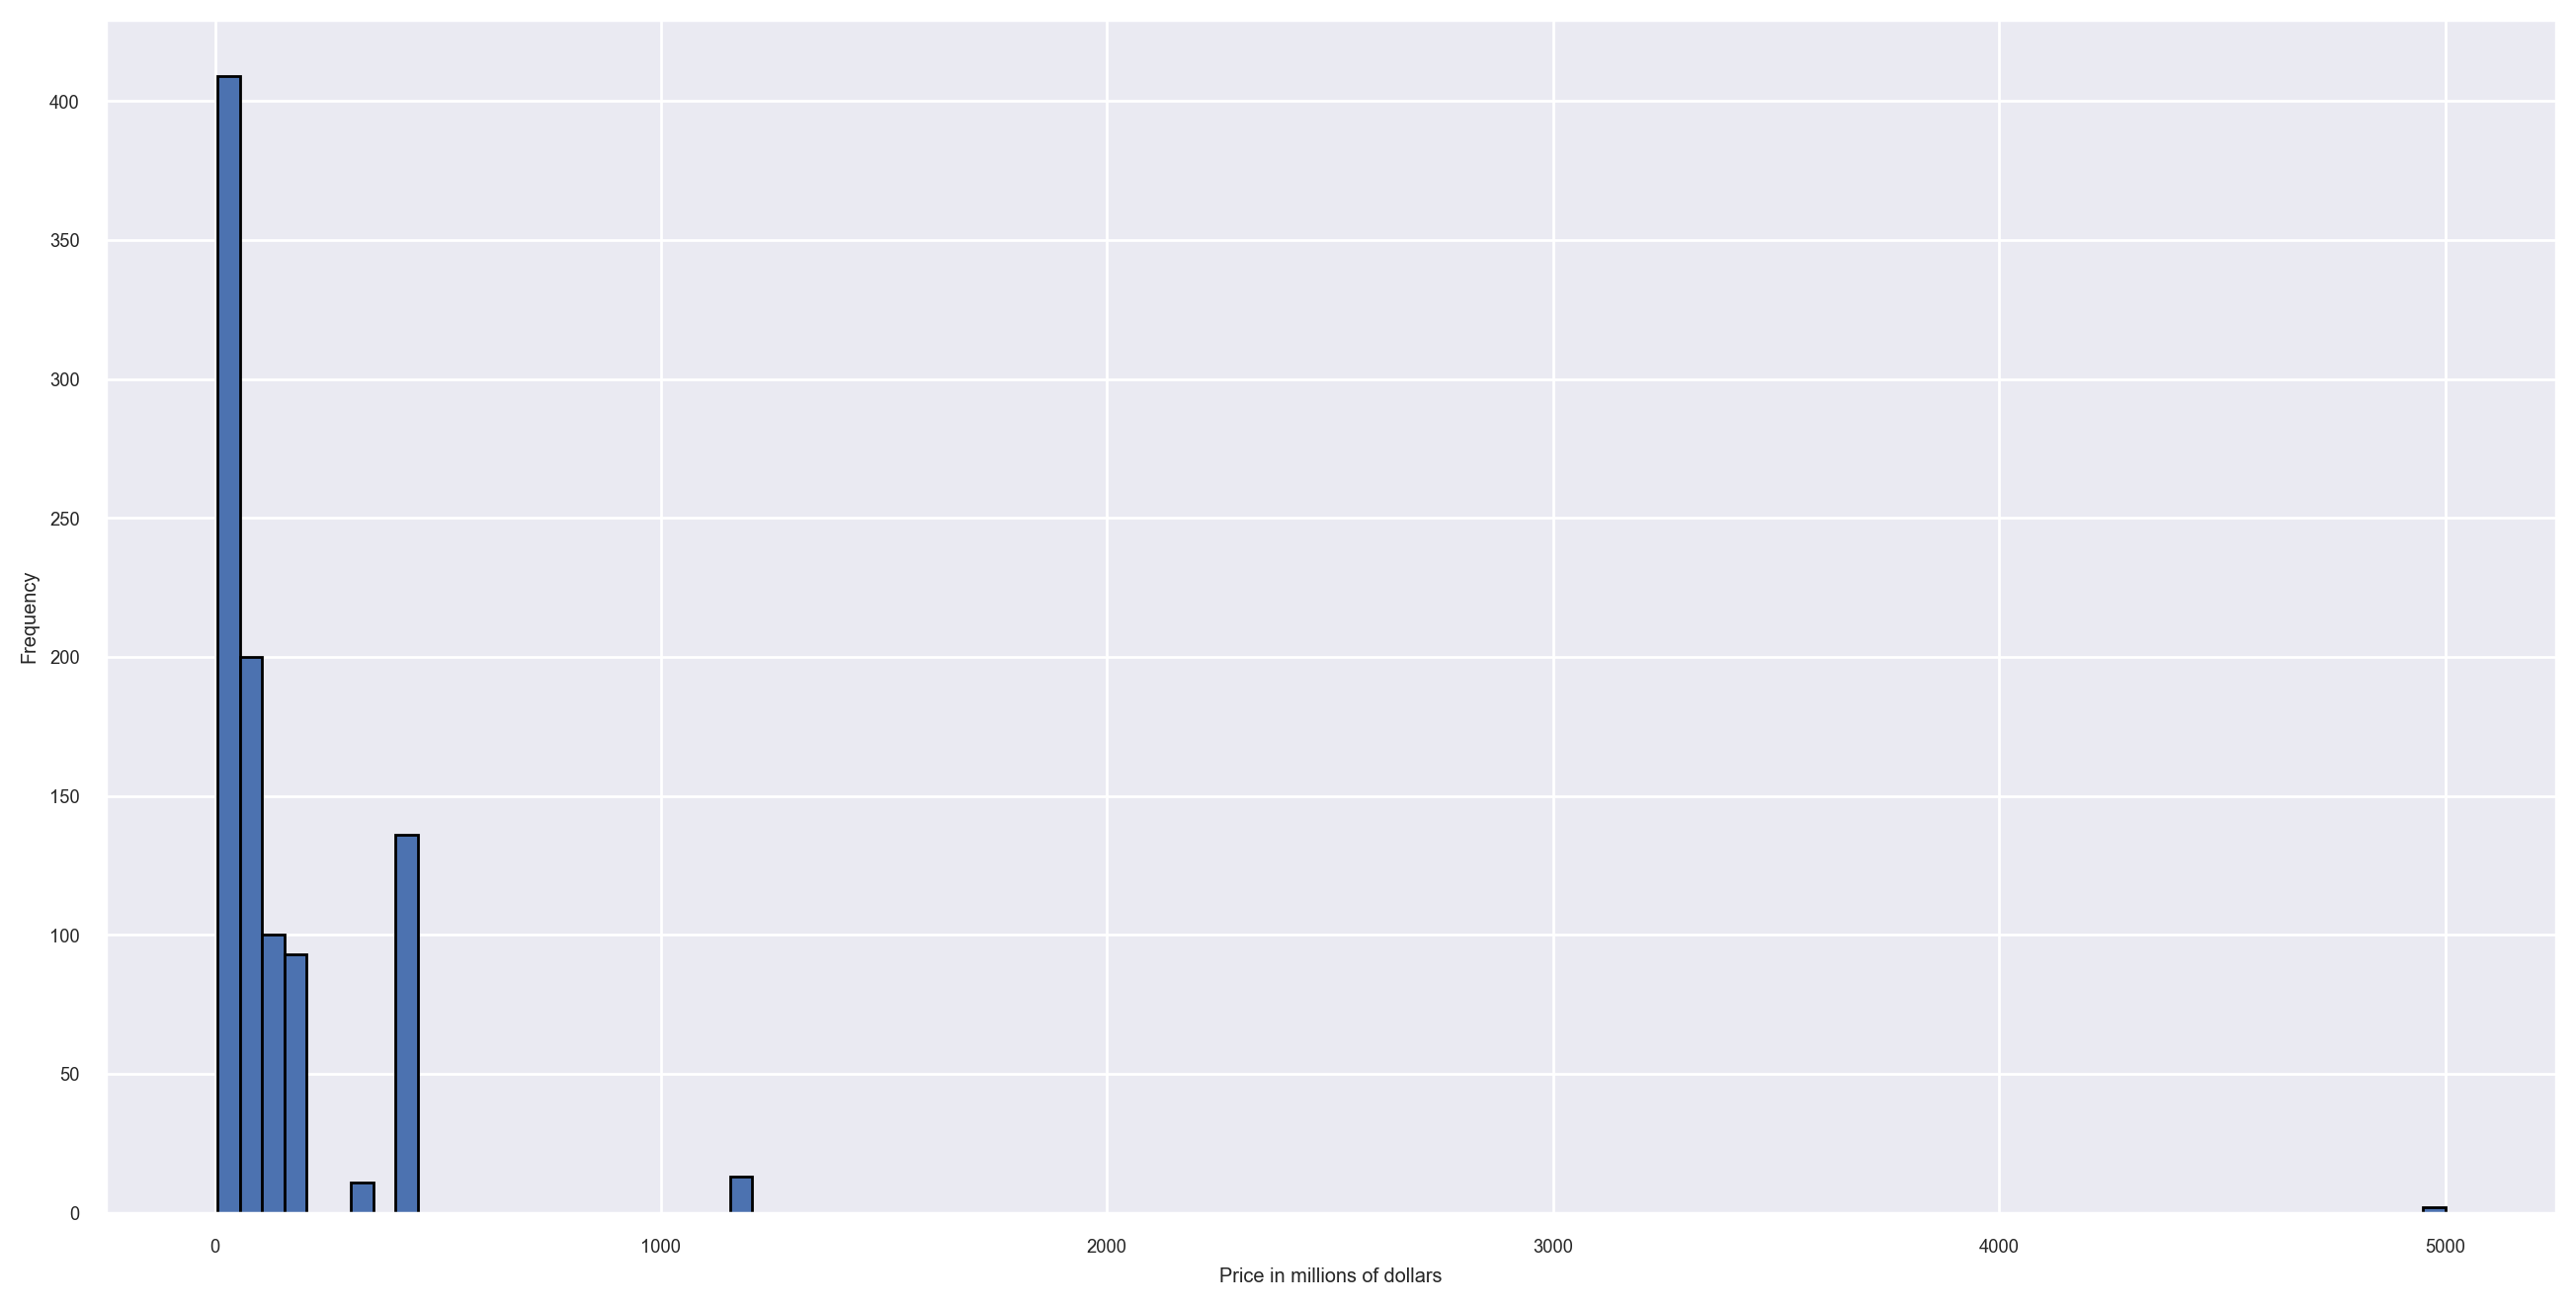

In [4271]:
plt.figure(figsize=(16,8), dpi=200)
fig = price_data['Price'].plot.hist(bins=100,ec='black')
plt.xlabel('Price in millions of dollars')
plt.show()

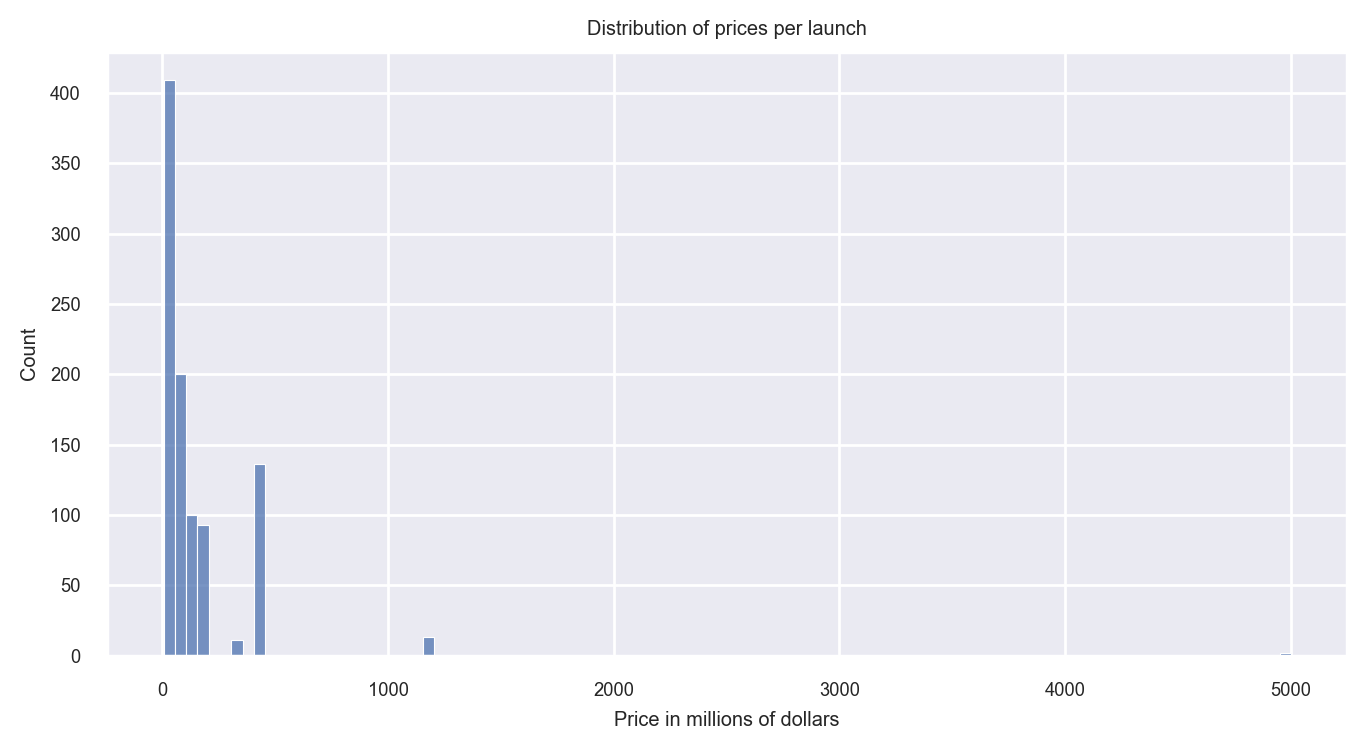

In [4272]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=price_data, x='Price',bins=100)
plt.xlabel('Price in millions of dollars')
plt.title('Distribution of prices per launch')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [4273]:
locations = df_data['Location'].str.split(', ',expand=False).to_frame()

for index,row in locations.iterrows():
    row['Location'] = row['Location'][len(row['Location'])-1]
    if row['Location'] == 'Russia' or row['Location'] == 'Barents Sea':
        row['Location'] = 'Russian Federation'
    if row['Location'] == 'New Mexico' or row['Location'] == 'Pacific Missile Range Facility' or row['Location'] == 'Gran Canaria':
        row['Location'] = 'USA'
    if row['Location'] == 'Yellow Sea':
        row['Location'] = 'China'
    if row['Location'] == 'Shahrud Missile Test Site':
        row['Location'] = 'Iran'
    if row['Location'] == 'North Korea':
        row['Location'] = "KOREA, DEMOCRATIC PEOPLE\'S REPUBLIC OF"
    if row['Location'] == 'South Korea':
        row['Location'] = "KOREA, REPUBLIC OF"
    if row['Location'] == 'Iran':
        row['Location'] = "IRAN, ISLAMIC REPUBLIC OF"

# Add country column to df_data
df_data['Country'] = locations

locations.value_counts()

Location                              
Russian Federation                        1398
USA                                       1351
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Pacific Ocean                               36
IRAN, ISLAMIC REPUBLIC OF                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF       5
Brazil                                       3
KOREA, REPUBLIC OF                           3
dtype: int64

In [4274]:
# Replace country names by their alpha3 code
for index,row in locations.iterrows():
    try:
        alpha_code = countries.get(row['Location']).alpha3
        row['Location'] = alpha_code
    except:
        continue

locations.value_counts()

Location     
RUS              1398
USA              1351
KAZ               701
FRA               303
CHN               269
JPN               126
IND                76
Pacific Ocean      36
IRN                14
NZL                13
ISR                11
KEN                 9
AUS                 6
PRK                 5
BRA                 3
KOR                 3
dtype: int64

In [4275]:
# Add alpha3 values to df_data dataframe
df_data['Location_ISO'] = locations

In [4276]:
# Number of launches per country
launches_by_countries = df_data.groupby('Location_ISO').agg({'Location_ISO':pd.Series.count})['Location_ISO']
launches_by_countries = launches_by_countries.sort_values(ascending=False)

In [4277]:
fig = px.bar(x=launches_by_countries.index,y=launches_by_countries.values,title='Number of Launches per Country')
fig.update_layout(xaxis_title='Country',yaxis_title='Number of Launches')
fig.show()

In [4278]:
world_map = px.choropleth(launches_by_countries,
                          locations=launches_by_countries.index,
                          color=launches_by_countries.values, 
                          hover_name=launches_by_countries.index, 
                          color_continuous_scale=px.colors.sequential.matter,
                          title='Number of launches per country')
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [4279]:
# Filter all missions that with status which is not success
failure_missions = df_data[df_data['Mission_Status'] != 'Success']

In [4280]:
failure_missions_by_country = failure_missions.groupby('Location_ISO',as_index=False)['Mission_Status'].count()
failure_missions_by_country = failure_missions_by_country.rename(columns={'Mission_Status':'Total number of failed missions'})
failure_missions_by_country.sort_values('Total number of failed missions',inplace=True,ascending=False)

In [4281]:
fig = px.bar(x=failure_missions_by_country['Location_ISO'],y=failure_missions_by_country['Total number of failed missions'],title='Number of Failed Missions per Country')
fig.update_layout(xaxis_title='Country',yaxis_title='Number of Failed Launches')
fig.show() 

In [4282]:
failure_missions_by_country

,Location_ISO,Total number of failed missions
14,USA,163
8,KAZ,93
13,RUS,93
2,CHN,25
3,FRA,18
4,IND,13
7,JPN,13
5,IRN,9
0,AUS,3
1,BRA,3


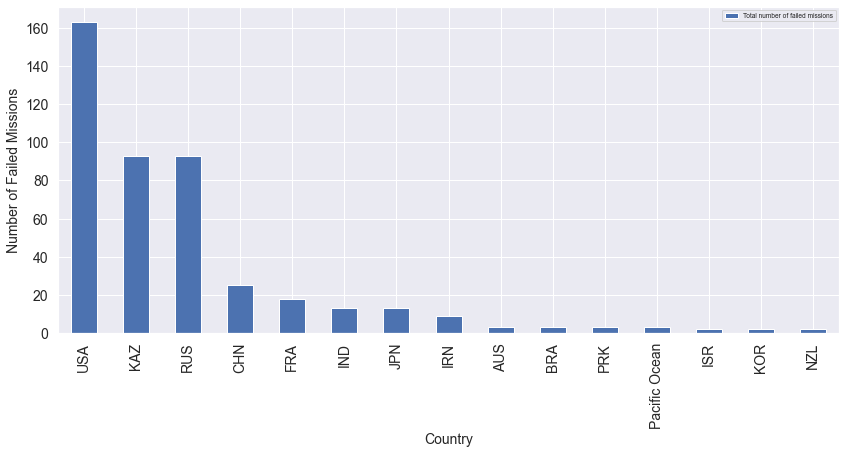

In [4283]:
fig = failure_missions_by_country.plot.bar(rot=90,x='Location_ISO',y='Total number of failed missions',figsize=(14,6),fontsize=14)
fig.set_xlabel('Country',fontsize=14)
fig.set_ylabel('Number of Failed Missions',fontsize=14)
plt.show()

In [4284]:
world_map = px.choropleth(failure_missions_by_country,
                          locations=failure_missions_by_country['Location_ISO'],
                          color=failure_missions_by_country['Total number of failed missions'], 
                          hover_name=failure_missions_by_country['Location_ISO'], 
                          color_continuous_scale=px.colors.sequential.matter,
                          title='Number of failed missions per country')
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [4285]:
country_city_org_mission_status = df_data.groupby(['Country','Organisation'],as_index=False)['Mission_Status'].value_counts()
country_city_org_mission_status

,Country,Organisation,Mission_Status,count
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Partial Failure,2
128,USA,US Navy,Failure,14
129,USA,US Navy,Success,2
130,USA,US Navy,Partial Failure,1


In [4286]:
burst = px.sunburst(country_city_org_mission_status, 
                    path=['Country','Organisation','Mission_Status'], 
                    values='count',
                    title='Mission status by countries and organisations',
                   )
 
burst.update_layout(coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [4287]:
price_data.reset_index(drop=True,inplace=True)
total_money_spent_by_orgs = price_data.groupby(['Organisation'])['Price'].count()
total_money_spent_by_orgs.sort_values(ascending=False,inplace=True)
total_money_spent_by_orgs

Organisation
CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
ESA                  1
EER                  1
Sandia               1
ExPace               1
Virgin Orbit         1
Name: Price, dtype: int64

In [4288]:
fig = px.bar(x=total_money_spent_by_orgs.index,y=total_money_spent_by_orgs.values,title='Total amount of money spent by organisations')
fig.update_layout(xaxis_title='Organisation',yaxis_title='Total money spent')
fig.show() 

# Analyse the Amount of Money Spent by Organisation per Launch

In [4289]:
money_spent_by_org_per_launch = price_data.groupby(['Organisation'],as_index=False)['Price'].value_counts()
money_spent_by_org_per_launch.rename(columns={'count':'Count'},inplace=True)
money_spent_by_org_per_launch

,Organisation,Price,Count
0,Arianespace,200.00,75
1,Arianespace,37.00,14
2,Arianespace,190.00,3
3,Arianespace,48.50,2
4,Arianespace,80.00,2
...,...,...,...
71,VKS RF,41.80,18
72,VKS RF,48.50,9
73,VKS RF,65.00,5
74,VKS RF,35.00,1


In [4290]:
fig = px.scatter(x=money_spent_by_org_per_launch['Price'],y=money_spent_by_org_per_launch['Count'],color=money_spent_by_org_per_launch['Organisation'],title='Amount of money spent by organisation per launch')
fig.update_layout(xaxis_title='Price in millions of dollars',yaxis_title='Number of launches')
fig.show() 

# Chart the Number of Launches per Year

In [4291]:
df_data['Year'] = pd.DatetimeIndex(df_data['Date']).year

In [4292]:
num_of_launches_per_year = df_data.groupby(['Year']).agg({'Year':pd.Series.count})['Year']
num_of_launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Year, Length: 64, dtype: int64

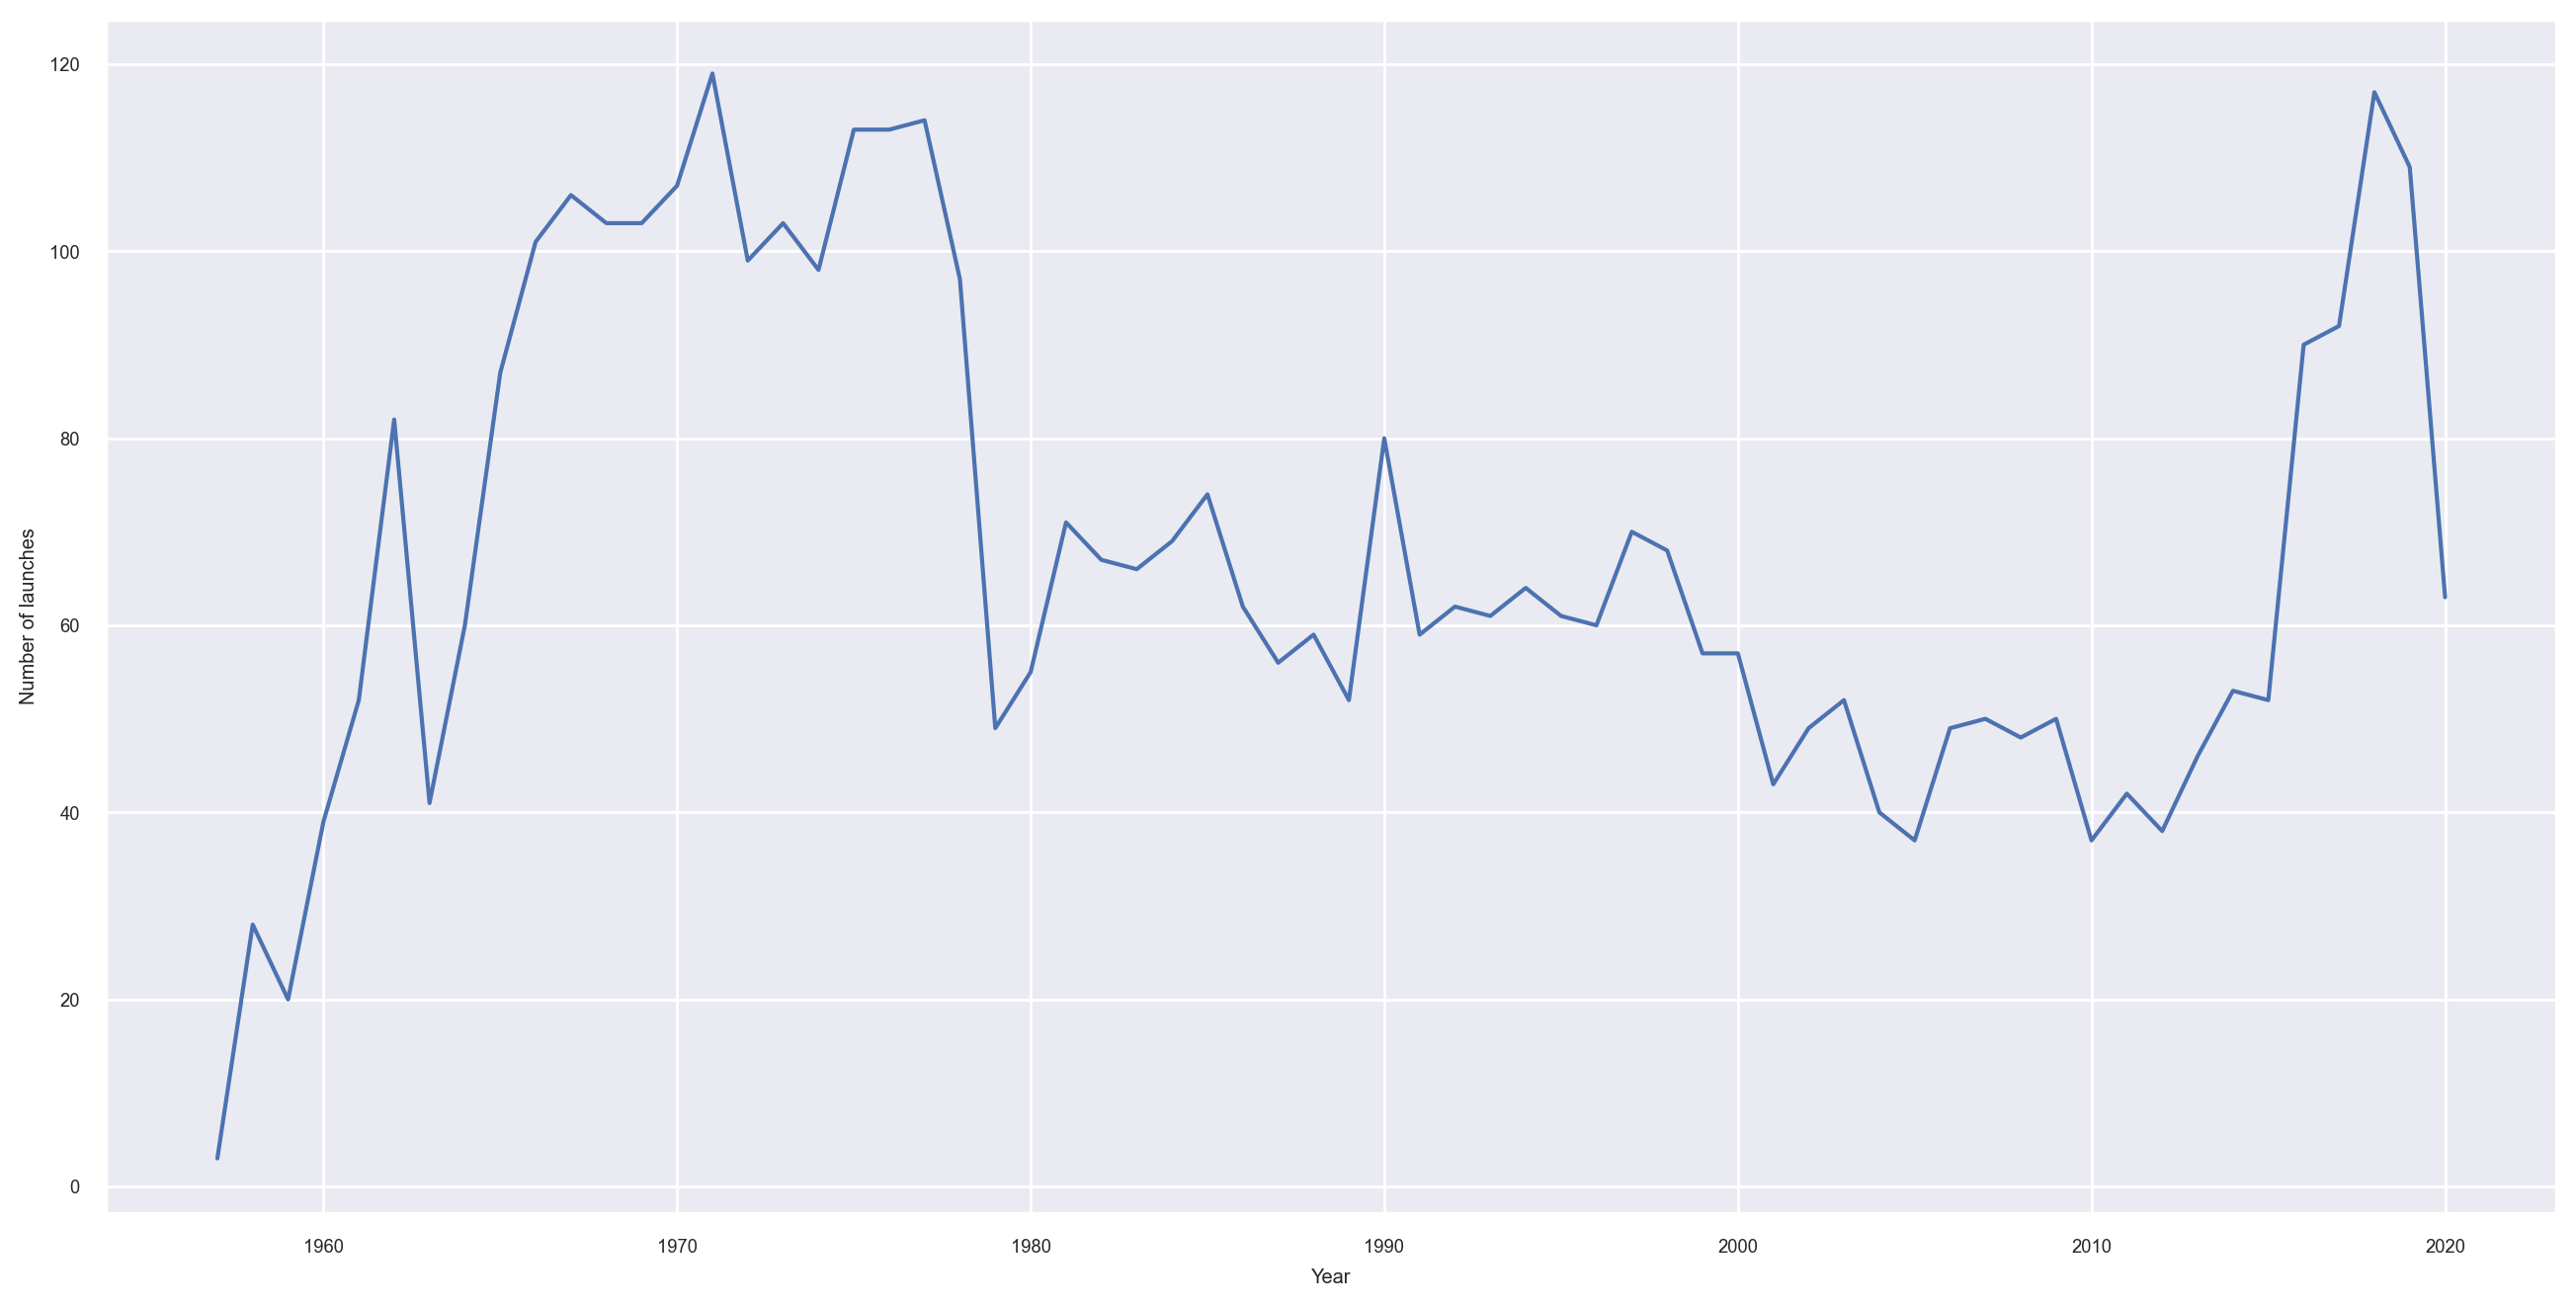

In [4293]:
plt.figure(figsize=(16,8), dpi=200)
plt.plot(num_of_launches_per_year.index,num_of_launches_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of launches')
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [4294]:
df_data['Month'] = pd.DatetimeIndex(df_data['Date']).month
df_data['Day'] = pd.DatetimeIndex(df_data['Date']).day
df_data['Year_Month'] = pd.DatetimeIndex(df_data['Date']).to_period('M')

In [4295]:
num_of_launches_per_month = df_data.groupby(['Year_Month']).agg({'Year_Month':pd.Series.count})['Year_Month']
num_of_launches_per_month

Year_Month
1957-10     1
1957-11     1
1957-12     1
1958-02     2
1958-03     3
           ..
2020-04     5
2020-05     9
2020-06     7
2020-07    14
2020-08     3
Freq: M, Name: Year_Month, Length: 747, dtype: int64

In [4296]:
rolling_avg_num_of_launches_per_month = num_of_launches_per_month.rolling(window=6).mean()

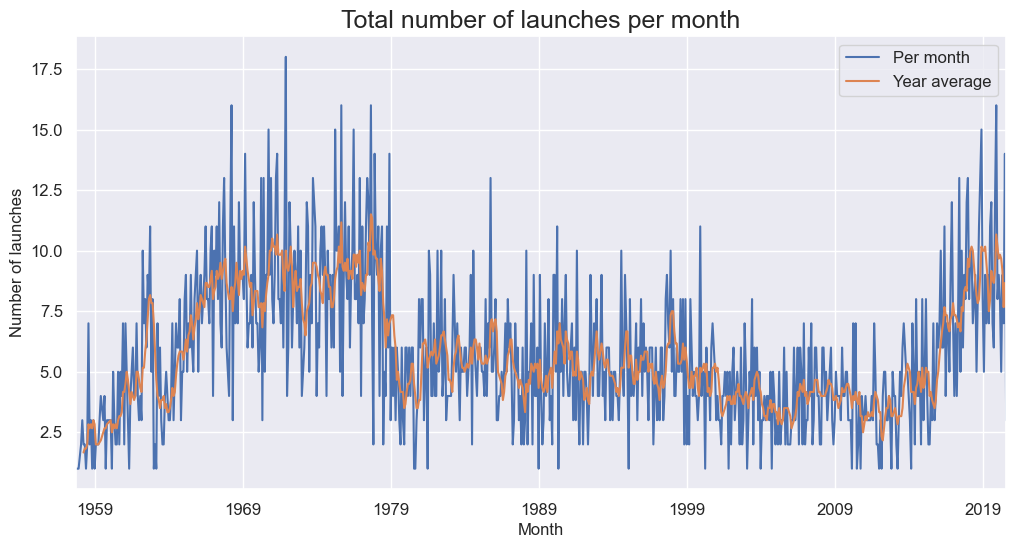

In [4297]:
plt.figure(figsize=(12,6), dpi=100)
plt.title('Total number of launches per month', fontsize=18)

num_of_launches_per_month.plot.line(fontsize=12,label='Per month')
rolling_avg_num_of_launches_per_month.plot.line(fontsize=12,label='Year average')

plt.xlabel('Month',fontsize=12)
plt.ylabel('Number of launches',fontsize=12)
plt.legend(fontsize=12)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [4298]:
total_launches_per_month = df_data.groupby(['Month'],as_index=False)['Month'].value_counts()
total_launches_per_month.rename(columns={'count':'Total number of launches'},inplace=True)

In [4299]:
total_launches_per_month.max()

Month                        12
Total number of launches    450
dtype: int64

In [4300]:
total_launches_per_month.min()

Month                         1
Total number of launches    268
dtype: int64

In [4301]:
total_launches_per_month['Total number of launches']

0     268
1     336
2     353
3     383
4     326
5     402
6     351
7     373
8     365
9     381
10    336
11    450
Name: Total number of launches, dtype: int64

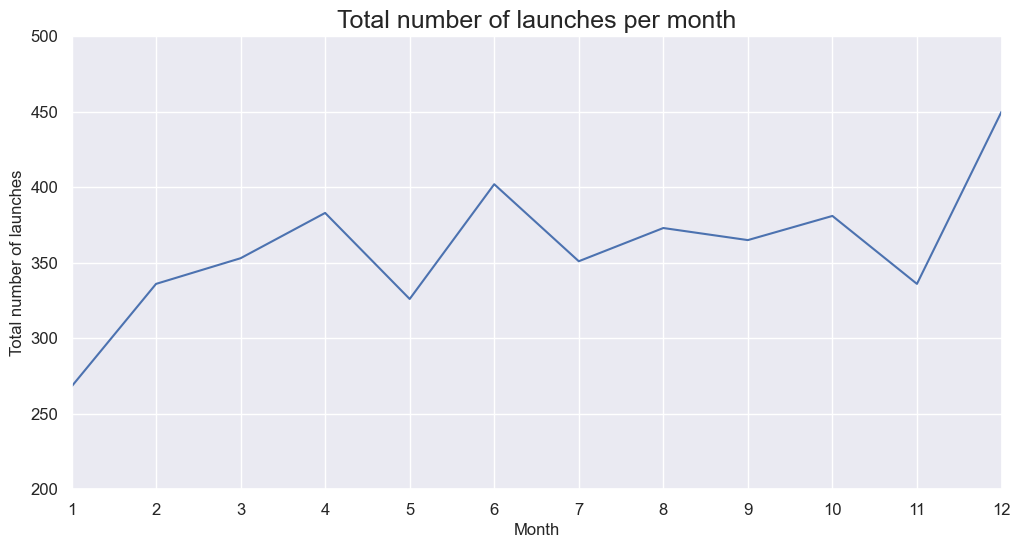

In [4302]:
plt.figure(figsize=(12,6), dpi=100)
plt.title('Total number of launches per month', fontsize=18)

plt.plot(total_launches_per_month['Month'],total_launches_per_month['Total number of launches'])

plt.xlabel('Month',fontsize=12)
plt.ylabel('Total number of launches',fontsize=12)
plt.xlim([1,12])
plt.ylim([200,500])
plt.xticks(np.linspace(1,12,12),fontsize=12)
plt.yticks(np.linspace(200,500,7), fontsize=12)

plt.show()

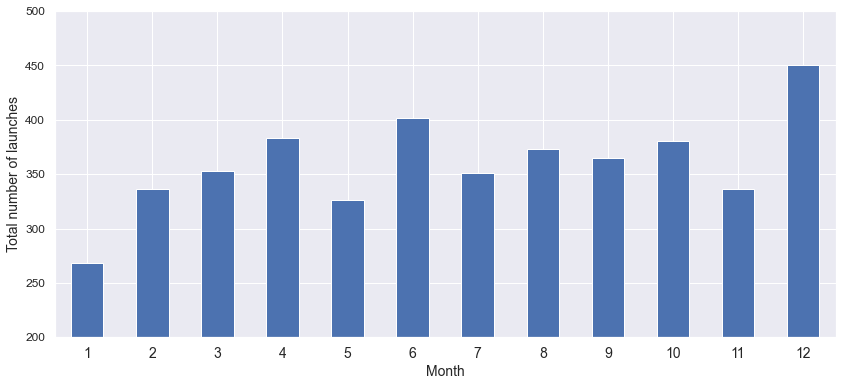

In [4303]:
fig = total_launches_per_month.plot.bar(rot=0,x='Month',y='Total number of launches',figsize=(14,6),fontsize=14,legend=None)
fig.set_xlabel('Month',fontsize=14)
fig.set_ylabel('Total number of launches',fontsize=14)
plt.ylim([200,500])
plt.yticks(np.linspace(200,500,7), fontsize=12)
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [4323]:
price_data = price_data.sort_values('Date',ascending=True).reset_index(drop=True)

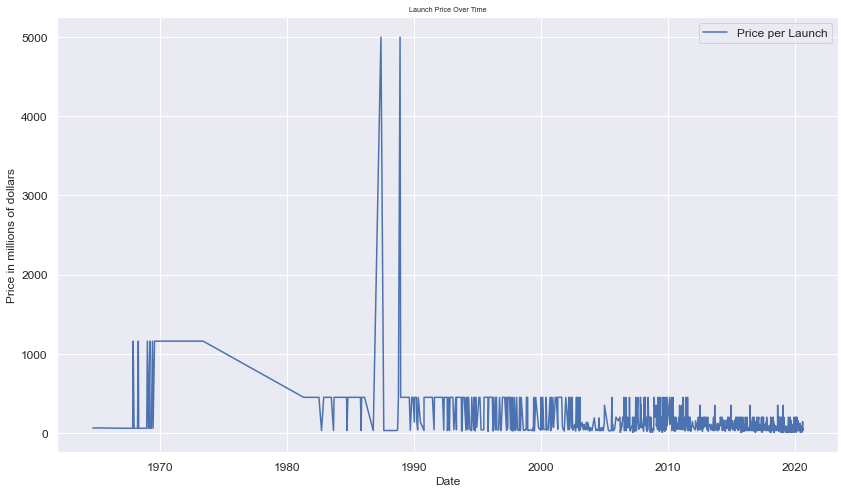

In [4324]:
price_data.plot.line(x='Date',y='Price',fontsize=12,label='Price per Launch',title='Launch Price Over Time',figsize=(14,8))

plt.xlabel('Date',fontsize=12)
plt.ylabel('Price in millions of dollars',fontsize=12)
plt.legend(fontsize=12)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 